In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import GammaRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon

In [3]:
output_path = '../data/output/'

Boys Weight Regression

In [4]:
boys_bw_path = '../data/raw/boys_BW_24_42_average.csv'

boys_bw_df = pd.read_csv(boys_bw_path)
boys_bw_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,0.47,0.49,0.53,0.68,0.87,0.93,0.97
1,25,0.54,0.56,0.60,0.77,0.99,1.06,1.11
2,26,0.61,0.64,0.69,0.88,1.13,1.21,1.26
3,27,0.69,0.73,0.78,1.00,1.28,1.37,1.44
4,28,0.69,0.73,0.78,1.00,1.28,1.37,1.44


In [5]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = boys_bw_df[(boys_bw_df['weeks'] >= 15) & (boys_bw_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_bw = pd.concat([new_data, selected_data], ignore_index=True)

result_bw = result_bw.round(2)

result_bw.head(5)

,weeks,3,5,10,50,90,95,97
0,15,0.21,0.22,0.24,0.33,0.47,0.51,0.54
1,16,0.23,0.24,0.26,0.37,0.51,0.56,0.59
2,17,0.25,0.27,0.29,0.40,0.56,0.61,0.65
3,18,0.28,0.30,0.32,0.44,0.61,0.66,0.70
4,19,0.31,0.33,0.36,0.49,0.66,0.72,0.77


In [6]:
result_bw.to_csv(output_path + 'boys_weight_regression_result.csv', index=False)

In [7]:
def centile_draw(df, label, gender):
        
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10, 6))
    
    centiles_list = ['3', '5', '10', '50', '90', '95', '97']
    
    for cent in centiles_list:
        # Создаем график для текущего центиля
        sns.lineplot(x='weeks', y=cent, data=df, label=cent)
    
    plt.xlabel('Weeks')
    plt.ylabel(label)
    plt.title(gender + ' ' + label + ' Centiles')
    plt.legend()
    
        
    label = label.lower()
    if label == 'weight/length':
        label = 'weight_length'
    gender = gender.lower()
    
    plt.savefig(f'{output_path}{gender}_{label}_regression_result.png')
    
    plt.show()

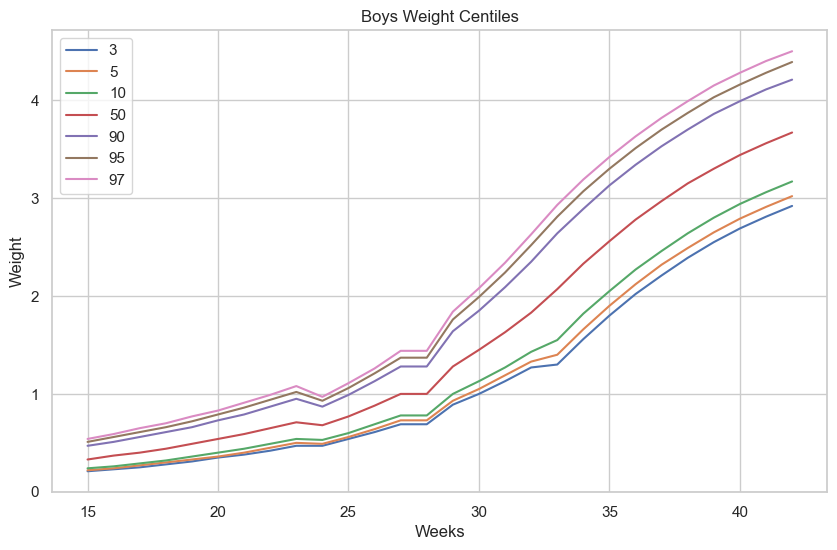

In [8]:
centile_draw(result_bw, 'Weight', 'Boys')

Boys Length Regression

In [9]:
boys_bl_path = '../data/raw/boys_BL_24_42_average.csv'

boys_bl_df = pd.read_csv(boys_bl_path)
boys_bl_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,27.87,28.47,29.43,32.76,36.09,37.04,37.64
1,25,29.14,29.76,30.70,34.03,37.36,38.30,38.93
2,26,30.41,31.03,31.96,35.30,38.63,39.57,40.19
3,27,31.67,32.29,33.24,36.57,39.90,40.84,41.46
4,28,32.94,33.56,34.51,37.84,41.17,42.13,42.73


In [10]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = boys_bl_df[(boys_bl_df['weeks'] >= 15) & (boys_bl_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_bl = pd.concat([new_data, selected_data], ignore_index=True)

result_bl = result_bl.round(2)

result_bl.head(5)

,weeks,3,5,10,50,90,95,97
0,15,22.33,22.96,23.97,27.66,31.45,32.51,33.20
1,16,23.02,23.65,24.67,28.34,32.11,33.17,33.86
2,17,23.73,24.37,25.38,29.04,32.79,33.84,34.52
3,18,24.46,25.10,26.11,29.76,33.48,34.52,35.20
4,19,25.22,25.86,26.87,30.49,34.19,35.22,35.90


In [11]:
result_bl.to_csv(output_path + 'boys_length_regression_result.csv', index=False)

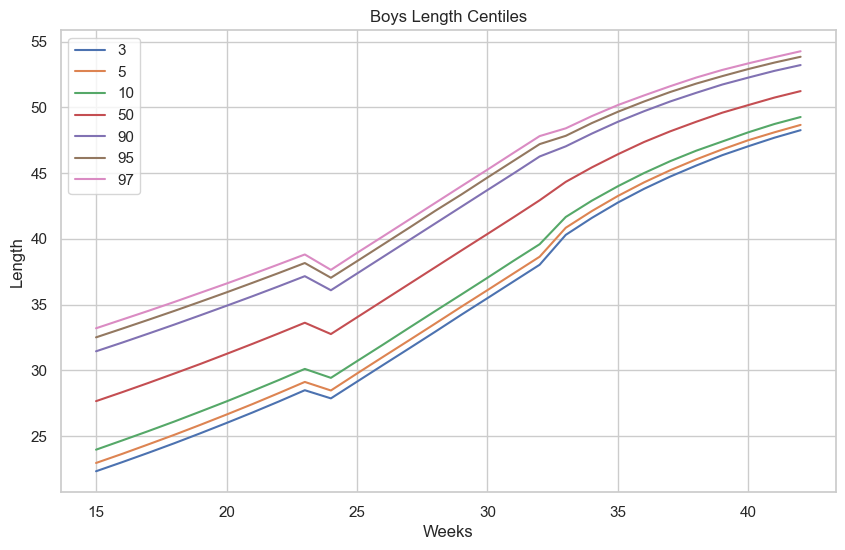

In [12]:
centile_draw(result_bl, 'Length', 'Boys')

Boys Weight/Length Regression

In [13]:
boys_bwl_path = '../data/raw/boys_BWL_24_42_average.csv'

boys_bwl_df = pd.read_csv(boys_bwl_path)
boys_bwl_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,1.23,1.37,1.59,2.35,3.12,3.33,3.47
1,25,1.35,1.49,1.71,2.47,3.24,3.45,3.59
2,26,1.50,1.64,1.86,2.62,3.39,3.61,3.75
3,27,1.69,1.83,2.04,2.81,3.57,3.79,3.93
4,28,1.69,1.83,2.04,2.81,3.57,3.79,3.93


In [14]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = boys_bwl_df[(boys_bwl_df['weeks'] >= 15) & (boys_bwl_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_bwl = pd.concat([new_data, selected_data], ignore_index=True)

result_bwl = result_bwl.round(2)

result_bwl.head(5)

,weeks,3,5,10,50,90,95,97
0,15,0.61,0.69,0.82,1.32,1.87,2.03,2.14
1,16,0.66,0.75,0.89,1.42,1.98,2.15,2.26
2,17,0.73,0.82,0.96,1.51,2.10,2.27,2.38
3,18,0.80,0.89,1.05,1.62,2.23,2.40,2.52
4,19,0.87,0.97,1.13,1.73,2.36,2.54,2.66


In [15]:
result_bwl.to_csv(output_path + 'boys_weight_length_regression_result.csv', index=False)

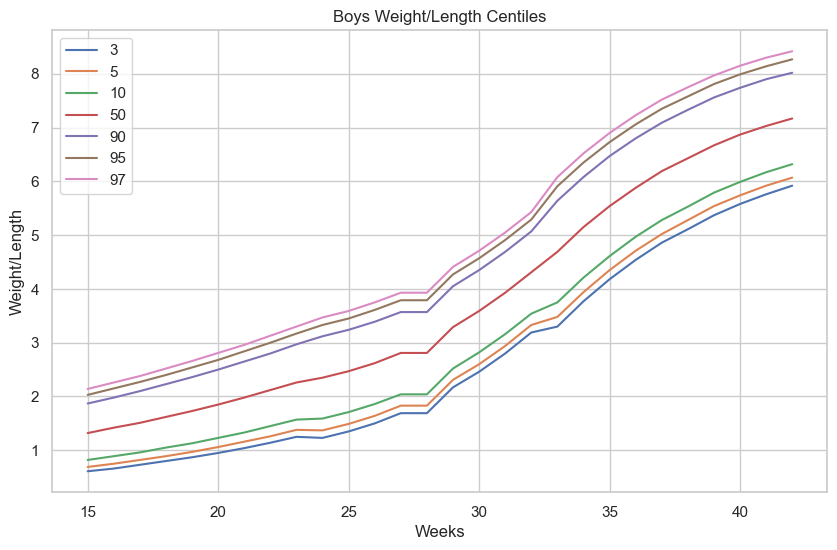

In [16]:
centile_draw(result_bwl, 'Weight/Length', 'Boys')

Girls Weight Regression

In [17]:
girls_bw_path = '../data/raw/girls_BW_24_42_average.csv'

girls_bw_df = pd.read_csv(girls_bw_path)
girls_bw_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,0.44,0.46,0.50,0.64,0.82,0.88,0.92
1,25,0.51,0.53,0.57,0.73,0.93,1.00,1.05
2,26,0.58,0.60,0.65,0.83,1.06,1.14,1.19
3,27,0.66,0.69,0.74,0.94,1.21,1.30,1.36
4,28,0.66,0.69,0.74,0.94,1.21,1.30,1.36


In [18]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = girls_bw_df[(girls_bw_df['weeks'] >= 15) & (girls_bw_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_girls_bw = pd.concat([new_data, selected_data], ignore_index=True)

result_girls_bw = result_girls_bw.round(2)

result_girls_bw.head(5)

,weeks,3,5,10,50,90,95,97
0,15,0.19,0.20,0.22,0.31,0.43,0.47,0.50
1,16,0.21,0.22,0.25,0.34,0.47,0.52,0.55
2,17,0.24,0.25,0.27,0.37,0.52,0.57,0.60
3,18,0.26,0.28,0.30,0.41,0.56,0.62,0.65
4,19,0.29,0.31,0.34,0.46,0.62,0.68,0.71


In [19]:
result_girls_bw.to_csv(output_path + 'girls_weight_regression_result.csv', index=False)

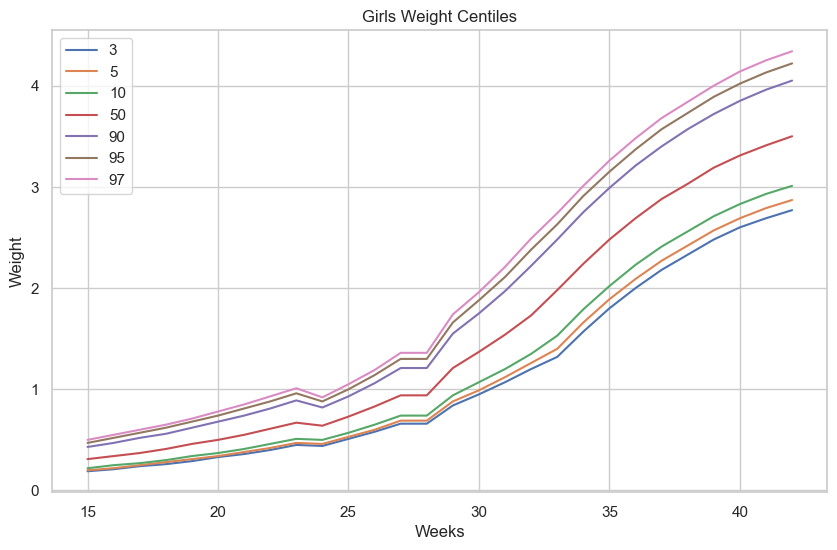

In [20]:
centile_draw(result_girls_bw, 'Weight', 'Girls')

Girls Length Regression

In [21]:
girls_bl_path = '../data/raw/girls_BL_24_42_average.csv'

girls_bl_df = pd.read_csv(girls_bl_path)
girls_bl_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,27.44,28.06,29.00,32.34,35.66,36.61,37.23
1,25,28.73,29.33,30.27,33.60,36.94,37.87,38.49
2,26,29.97,30.60,31.54,34.87,38.20,39.14,39.76
3,27,31.26,31.86,32.81,36.14,39.47,40.43,41.04
4,28,31.26,31.86,32.81,36.14,39.47,40.43,41.04


In [22]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = girls_bl_df[(girls_bl_df['weeks'] >= 15) & (girls_bl_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
	y = selected_data[centile]
	X = selected_data[['weeks']]
	regression_model.fit(X, y)

	predicted_values = regression_model.predict(new_data[['weeks']])
	new_data[centile] = predicted_values

result_girls_bl = pd.concat([new_data, selected_data], ignore_index=True)

result_girls_bl = result_girls_bl.round(2)

result_girls_bl.head(5)

,weeks,3,5,10,50,90,95,97
0,15,21.85,22.52,23.52,27.21,31.04,32.14,32.85
1,16,22.54,23.21,24.21,27.89,31.70,32.78,33.48
2,17,23.24,23.92,24.92,28.58,32.36,33.43,34.13
3,18,23.97,24.65,25.65,29.29,33.04,34.10,34.80
4,19,24.73,25.40,26.40,30.02,33.73,34.78,35.47


In [23]:
result_girls_bl.to_csv(output_path + 'girls_length_regression_result.csv', index=False)

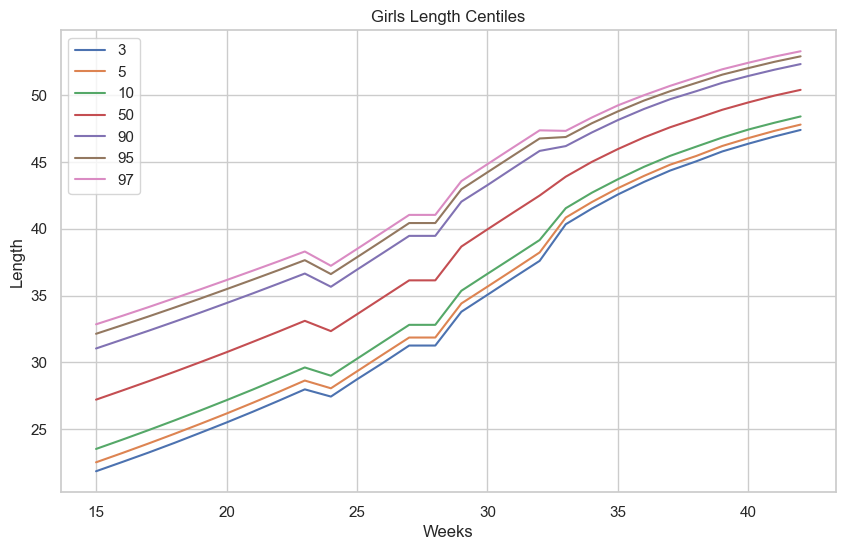

In [24]:
centile_draw(result_girls_bl, 'Length', 'Girls')

Boys Weight/Length Regression

In [25]:
girls_bwl_path = '../data/raw/girls_BWL_24_42_average.csv'

girls_bwl_df = pd.read_csv(girls_bwl_path)
girls_bwl_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,1.09,1.23,1.45,2.21,2.98,3.19,3.34
1,25,1.21,1.35,1.57,2.33,3.10,3.32,3.46
2,26,1.36,1.50,1.72,2.48,3.25,3.47,3.61
3,27,1.55,1.69,1.91,2.67,3.43,3.65,3.79
4,28,1.55,1.69,1.91,2.67,3.43,3.65,3.79


In [26]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = girls_bwl_df[(girls_bwl_df['weeks'] >= 15) & (girls_bwl_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_girls_bwl = pd.concat([new_data, selected_data], ignore_index=True)

result_girls_bwl = result_girls_bwl.round(2)

result_girls_bwl.head(5)

,weeks,3,5,10,50,90,95,97
0,15,0.53,0.61,0.74,1.23,1.77,1.93,2.04
1,16,0.58,0.67,0.80,1.32,1.88,2.05,2.16
2,17,0.64,0.73,0.88,1.41,2.00,2.17,2.28
3,18,0.70,0.80,0.95,1.52,2.12,2.29,2.41
4,19,0.78,0.88,1.04,1.62,2.25,2.43,2.55


In [27]:
result_girls_bwl.to_csv(output_path + 'girls_weight_length_regression_result.csv', index=False)

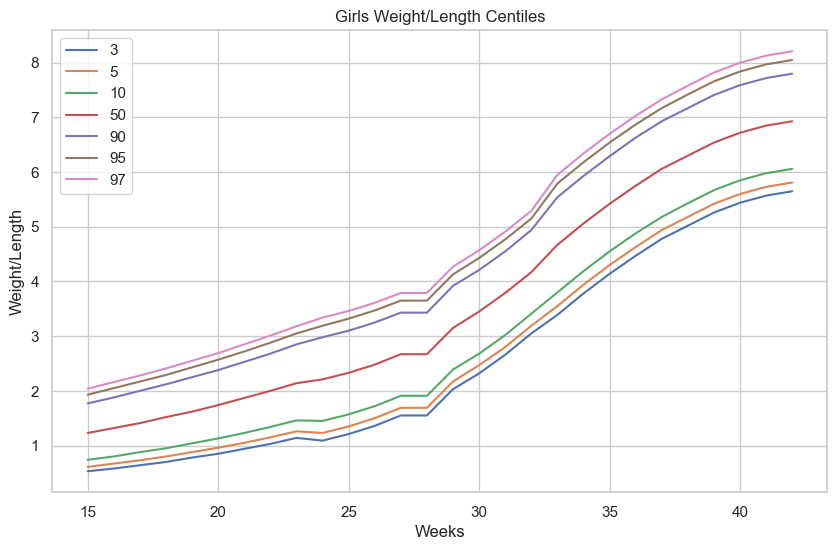

In [28]:
centile_draw(result_girls_bwl, 'Weight/Length', 'Girls')

Combined Weight Regression

In [29]:
compare_BW_path = '../data/raw/compare_BW.xlsx'

In [30]:
combined_bw_df = pd.read_excel(compare_BW_path, sheet_name='intergrowth21', skiprows=1)
combined_bw_df = combined_bw_df.rename(columns={'Unnamed: 0': 'weeks', '3rd': '3', '5th': '5', '10th': '10', '50th': '50', '90th': '90', '95th': '95', '97th': '97'})
for item in ['3', '5', '10', '50', '90', '95', '97']:
    combined_bw_df[item] /= 1000

combined_bw_df['weeks'] += 2    

combined_bw_df.head(5)

,weeks,3,5,10,50,90,95,97
0,24,0.463,0.470,0.481,0.525,0.578,0.596,0.607
1,25,0.516,0.524,0.538,0.592,0.658,0.680,0.695
2,26,0.575,0.585,0.602,0.669,0.751,0.778,0.796
3,27,0.641,0.654,0.674,0.756,0.858,0.891,0.913
4,28,0.716,0.732,0.757,0.856,0.980,1.020,1.048


In [31]:
# Setting the desired range
start_week = 15
end_week = 23

# Selecting weeks from 15 to 42
selected_data = combined_bw_df[(combined_bw_df['weeks'] >= 15) & (combined_bw_df['weeks'] <= 42)]

new_weeks = list(range(start_week, end_week + 1))
new_data = pd.DataFrame({'weeks': new_weeks})

regression_model = GammaRegressor()

# Training the model
X = selected_data[['weeks']]
centiles = ['3', '5', '10', '50', '90', '95', '97']
for centile in centiles:
    y = selected_data[centile]
    X = selected_data[['weeks']]
    regression_model.fit(X, y)
    
    predicted_values = regression_model.predict(new_data[['weeks']])
    new_data[centile] = predicted_values

result_combined_bw = pd.concat([new_data, selected_data], ignore_index=True)

result_combined_bw = result_combined_bw.round(2)

result_combined_bw.head(5)

,weeks,3,5,10,50,90,95,97
0,15,0.21,0.22,0.22,0.23,0.25,0.26,0.27
1,16,0.24,0.24,0.24,0.26,0.28,0.29,0.30
2,17,0.26,0.26,0.26,0.28,0.31,0.32,0.33
3,18,0.29,0.29,0.29,0.31,0.35,0.36,0.37
4,19,0.31,0.32,0.32,0.35,0.39,0.40,0.41


In [32]:
result_combined_bw.to_csv(output_path + 'combined_weight_regression_result.csv', index=False)

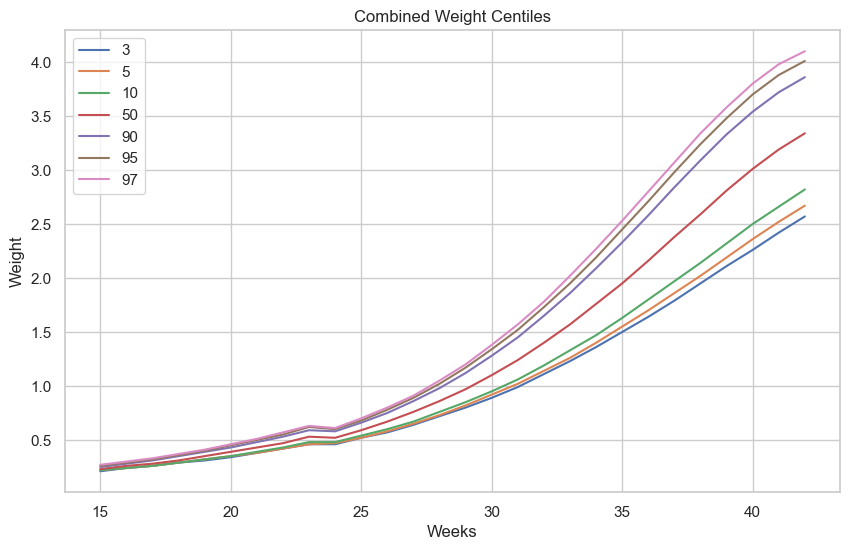

In [33]:
centile_draw(result_combined_bw, 'Weight', 'Combined')

Comparing the results with Kiserud

Boys

In [34]:
centile_columns = ['5', '10', '50', '90', '95']

In [35]:
kiserud_boys_df = pd.read_excel(compare_BW_path, sheet_name='Kiserud_male', skiprows=1)
kiserud_boys_df = kiserud_boys_df.rename(columns={'Unnamed: 0': 'weeks'})
kiserud_boys_df = kiserud_boys_df.loc[kiserud_boys_df['weeks'] != 14]
kiserud_boys_df = kiserud_boys_df.drop(27)
kiserud_boys_df.columns = kiserud_boys_df.columns.astype(str)
kiserud_boys_df = kiserud_boys_df.drop(columns=['25', '75'])
kiserud_boys_df = kiserud_boys_df.set_index(np.arange(len(kiserud_boys_df)))

for item in centile_columns:
    kiserud_boys_df[item] /= 1000

kiserud_boys_df.head(5)

,weeks,5,10,50,90,95
0,15,0.096,0.100,0.116,0.134,0.139
1,16,0.121,0.127,0.146,0.169,0.175
2,17,0.152,0.158,0.183,0.210,0.219
3,18,0.188,0.196,0.226,0.260,0.271
4,19,0.232,0.241,0.277,0.320,0.333


In [36]:
result_bw_compare_df = result_bw.copy()
result_bw_compare_df = result_bw_compare_df.loc[result_bw_compare_df['weeks'] < 41]
result_bw_compare_df = result_bw_compare_df.drop(columns=['3', '97'])

result_bw_compare_df.head(5)

,weeks,5,10,50,90,95
0,15,0.22,0.24,0.33,0.47,0.51
1,16,0.24,0.26,0.37,0.51,0.56
2,17,0.27,0.29,0.40,0.56,0.61
3,18,0.30,0.32,0.44,0.61,0.66
4,19,0.33,0.36,0.49,0.66,0.72


In [37]:
# Applying the Wilcoxon test
difference_data = pd.DataFrame(columns=centile_columns)

for centile in centile_columns:
    intergrowth_values = result_bw_compare_df[centile]
    kiserud_values = kiserud_boys_df[centile]
    
    res = wilcoxon(intergrowth_values, kiserud_values)
    
    difference_data.loc['p_value', centile] = res[1]

print(difference_data)

                5        10        50        90        95
p_value  0.001298  0.005613  0.783534  0.000052  0.000011


Girls

In [38]:
kiserud_girls_df = pd.read_excel(compare_BW_path, sheet_name='Kiserud_female', skiprows=1)
kiserud_girls_df = kiserud_girls_df.rename(columns={'Unnamed: 0': 'weeks'})
kiserud_girls_df = kiserud_girls_df.loc[kiserud_girls_df['weeks'] != 14]
kiserud_girls_df = kiserud_girls_df.drop(27)
kiserud_girls_df.columns = kiserud_girls_df.columns.astype(str)
kiserud_girls_df = kiserud_girls_df.drop(columns=['25', '75'])
kiserud_girls_df = kiserud_girls_df.set_index(np.arange(len(kiserud_girls_df)))

for item in centile_columns:
    kiserud_girls_df[item] /= 1000

kiserud_girls_df.head(5)

,weeks,5,10,50,90,95
0,15,0.092,0.097,0.113,0.129,0.135
1,16,0.116,0.122,0.141,0.162,0.170
2,17,0.145,0.152,0.176,0.202,0.211
3,18,0.180,0.188,0.217,0.248,0.261
4,19,0.221,0.231,0.266,0.304,0.319


In [39]:
result_girls_bw_compare_df = result_girls_bw.copy()
result_girls_bw_compare_df = result_girls_bw_compare_df.loc[result_girls_bw_compare_df['weeks'] < 41]
result_girls_bw_compare_df = result_girls_bw_compare_df.drop(columns=['3', '97'])

result_girls_bw_compare_df.head(5)

,weeks,5,10,50,90,95
0,15,0.20,0.22,0.31,0.43,0.47
1,16,0.22,0.25,0.34,0.47,0.52
2,17,0.25,0.27,0.37,0.52,0.57
3,18,0.28,0.30,0.41,0.56,0.62
4,19,0.31,0.34,0.46,0.62,0.68


In [40]:
# Applying the Wilcoxon test
difference_data = pd.DataFrame(columns=centile_columns)

for centile in centile_columns:
    intergrowth_values = result_girls_bw_compare_df[centile]
    kiserud_values = kiserud_girls_df[centile]
    
    res = wilcoxon(intergrowth_values, kiserud_values)
    
    difference_data.loc['p_value', centile] = res[1]

print(difference_data)

                5        10        50        90        95
p_value  0.015132  0.011967  0.980084  0.000835  0.000032


Combined

In [41]:
kiserud_combined_df = pd.read_excel(compare_BW_path, sheet_name='Kiserud', skiprows=1)
kiserud_combined_df = kiserud_combined_df.rename(columns={'Unnamed: 0': 'weeks'})
kiserud_combined_df = kiserud_combined_df.loc[kiserud_combined_df['weeks'] != 14]
kiserud_combined_df.columns = kiserud_combined_df.columns.astype(str)
kiserud_combined_df = kiserud_combined_df.drop(columns=['2.5', '25', '75', '97.5'])
kiserud_combined_df = kiserud_combined_df.set_index(np.arange(len(kiserud_combined_df)))

for item in centile_columns:
    kiserud_combined_df[item] /= 1000

kiserud_combined_df.head(30)

,weeks,5,10,50,90,95
0,15,0.093,0.099,0.114,0.132,0.138
1,16,0.117,0.124,0.144,0.166,0.174
2,17,0.146,0.155,0.179,0.207,0.217
3,18,0.181,0.192,0.222,0.255,0.268
4,19,0.223,0.235,0.272,0.313,0.328
5,20,0.271,0.286,0.330,0.380,0.399
6,21,0.327,0.345,0.398,0.458,0.481
7,22,0.392,0.412,0.476,0.548,0.575
8,23,0.465,0.489,0.565,0.650,0.682
9,24,0.548,0.576,0.665,0.765,0.803


In [42]:
result_combined_bw_compare_df = result_combined_bw.copy()
result_combined_bw_compare_df = result_combined_bw_compare_df.loc[result_combined_bw_compare_df['weeks'] < 41]
result_combined_bw_compare_df = result_combined_bw_compare_df.drop(columns=['3', '97'])

result_combined_bw_compare_df.head(30)

,weeks,5,10,50,90,95
0,15,0.22,0.22,0.23,0.25,0.26
1,16,0.24,0.24,0.26,0.28,0.29
2,17,0.26,0.26,0.28,0.31,0.32
3,18,0.29,0.29,0.31,0.35,0.36
4,19,0.32,0.32,0.35,0.39,0.40
5,20,0.35,0.35,0.39,0.43,0.45
6,21,0.38,0.39,0.43,0.48,0.50
7,22,0.42,0.43,0.47,0.53,0.55
8,23,0.46,0.48,0.53,0.59,0.62
9,24,0.47,0.48,0.52,0.58,0.60


In [43]:
# Applying the Wilcoxon test
difference_data = pd.DataFrame(columns=centile_columns)

for centile in centile_columns:
    intergrowth_values = result_combined_bw_compare_df[centile]
    kiserud_values = kiserud_combined_df[centile]
    
    res = wilcoxon(intergrowth_values, kiserud_values)
    
    difference_data.loc['p_value', centile] = res[1]

print(difference_data)

                5        10        50        90        95
p_value  0.001044  0.000664  0.000282  0.000248  0.000217


Comparing the results with Adeyekun

Combined

In [49]:
adeyekun_combined_df = pd.read_excel(compare_BW_path, sheet_name='Adeyekun', skiprows=2)
adeyekun_combined_df = adeyekun_combined_df.rename(columns={'Unnamed: 0': 'weeks', 'M': '50'})
adeyekun_combined_df = adeyekun_combined_df[['weeks', '50']]
adeyekun_combined_df['50'] /= 1000

adeyekun_combined_df.head(30)

,weeks,50
0,15,0.1470
1,16,0.1815
2,17,0.2125
3,18,0.2333
4,19,0.3305
5,20,0.3578
6,21,0.4217
7,22,0.5425
8,23,0.5998
9,24,0.6915


In [50]:
# Applying the Wilcoxon test
difference_data = pd.DataFrame(columns=centile_columns)

intergrowth_values = result_combined_bw_compare_df['50']
adeyekun_values = adeyekun_combined_df['50']

res = wilcoxon(intergrowth_values, adeyekun_values)

difference_data.loc['p_value', '50'] = res[1]

print(difference_data)

           5   10        50   90   95
p_value  NaN  NaN  0.000109  NaN  NaN


Comparing the results with Bartosch

Combined

In [59]:
bartosch_combined_df = pd.read_excel(compare_BW_path, sheet_name='Bartosch')
bartosch_combined_df = bartosch_combined_df.rename(columns={'Gestational age (weeks)': 'weeks', 'BW(g) M': '50'})
bartosch_combined_df = bartosch_combined_df[['weeks', '50']]
bartosch_combined_df = bartosch_combined_df.loc[bartosch_combined_df['weeks'] > 14]
bartosch_combined_df = bartosch_combined_df.loc[bartosch_combined_df['weeks'] < 41]
bartosch_combined_df['50'] /= 1000
bartosch_combined_df = bartosch_combined_df.set_index(np.arange(len(bartosch_combined_df)))

bartosch_combined_df.head(30)

,weeks,50
0,15,0.0625
1,16,0.0952
2,17,0.1370
3,18,0.1878
4,19,0.2475
5,20,0.3157
6,21,0.3923
7,22,0.4771
8,23,0.5700
9,24,0.6708


In [60]:
# Applying the Wilcoxon test
difference_data = pd.DataFrame(columns=centile_columns)

intergrowth_values = result_combined_bw_compare_df['50']
bartosch_values = bartosch_combined_df['50']

res = wilcoxon(intergrowth_values, bartosch_values)

difference_data.loc['p_value', '50'] = res[1]

print(difference_data)

           5   10        50   90   95
p_value  NaN  NaN  0.000364  NaN  NaN
